In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

N= 20

#Random data on x-axis in the range of (-5,5)
X = np.random.random(N)*10 - 5

# A line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)


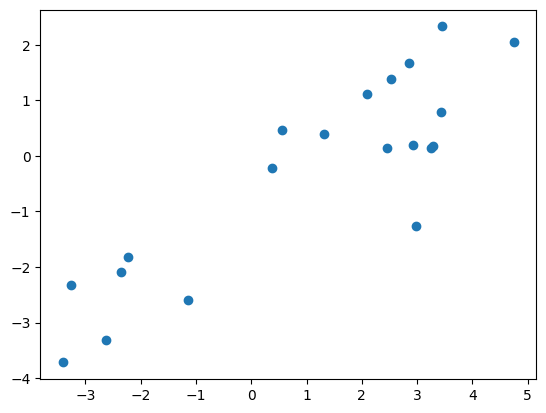

In [2]:
#Plot data
plt.scatter(X, Y)

In [3]:
#Create linear regression model
model = nn.Linear(1, 1)

In [4]:
#Create loss and optimizer functions
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [5]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [6]:
#Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [7]:
type(inputs)

torch.Tensor

In [8]:
#Train model

n_epochs = 30
losses = []

for it in range(n_epochs):
  #zero the parameter gradients
  optimizer.zero_grad()

  #Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  #Keep the losses for plotting later
  losses.append(loss.item())

  #Backward
  loss.backward()
  optimizer.step()

  print(f'Epoch{it+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch1/30, Loss: 2.3746
Epoch2/30, Loss: 1.7941
Epoch3/30, Loss: 1.4433
Epoch4/30, Loss: 1.2164
Epoch5/30, Loss: 1.0643
Epoch6/30, Loss: 0.9605
Epoch7/30, Loss: 0.8890
Epoch8/30, Loss: 0.8395
Epoch9/30, Loss: 0.8053
Epoch10/30, Loss: 0.7815
Epoch11/30, Loss: 0.7650
Epoch12/30, Loss: 0.7536
Epoch13/30, Loss: 0.7457
Epoch14/30, Loss: 0.7402
Epoch15/30, Loss: 0.7364
Epoch16/30, Loss: 0.7337
Epoch17/30, Loss: 0.7319
Epoch18/30, Loss: 0.7306
Epoch19/30, Loss: 0.7297
Epoch20/30, Loss: 0.7291
Epoch21/30, Loss: 0.7287
Epoch22/30, Loss: 0.7284
Epoch23/30, Loss: 0.7282
Epoch24/30, Loss: 0.7280
Epoch25/30, Loss: 0.7279
Epoch26/30, Loss: 0.7279
Epoch27/30, Loss: 0.7278
Epoch28/30, Loss: 0.7278
Epoch29/30, Loss: 0.7278
Epoch30/30, Loss: 0.7278


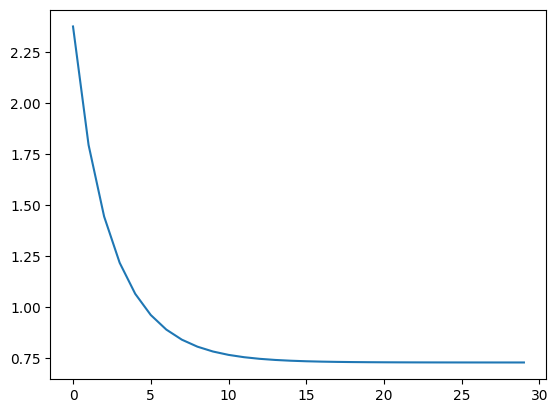

In [9]:
#Plot  losses per iteration
plt.plot(losses)

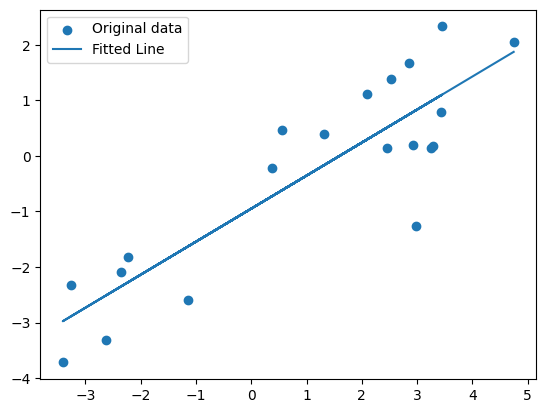

In [10]:
#Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label = 'Original data')
plt.plot(X, predicted, label='Fitted Line')
plt.legend()
plt.show()

In [11]:
#Another way for detaching model predictions
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[ 1.8732785 ],
       [-2.2775443 ],
       [ 0.82307935],
       [-0.622704  ],
       [ 0.9826329 ],
       [ 1.0075853 ],
       [ 0.7887752 ],
       [ 1.0926005 ],
       [ 0.5569236 ],
       [-2.350502  ],
       [-2.976303  ],
       [ 0.5101892 ],
       [-1.6299748 ],
       [ 0.29518998],
       [-2.5127015 ],
       [ 1.103221  ],
       [-0.1695559 ],
       [ 0.74490654],
       [-0.7225242 ],
       [-2.8889418 ]], dtype=float32)

In [12]:
#Model weights and bias : True values are (0.5, -1)

w =model.weight.data.numpy()
b = model.bias.data.numpy()

print(w, b)

[[0.5946229]] [-0.9490944]
